In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
tX=open("drive/My Drive/lastassignmentdataset/trainX.pickle","rb")
trainX= pickle.load(tX)

In [0]:
tX2=open("drive/My Drive/lastassignmentdataset/testX.pickle","rb")
testX= pickle.load(tX2)
tY=open("drive/My Drive/lastassignmentdataset/trainY.pickle","rb")
trainY= pickle.load(tY)


In [7]:
trainX.shape

(60000, 28, 28)

In [0]:
#import cv2 


In [0]:
plt.imsave('fname.jpg',np.array(trainX[0]).reshape(28,28))

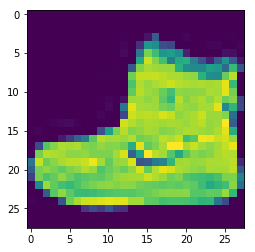

In [9]:
plt.imshow(np.array(trainX[0]))

In [0]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(trainX, trainY, test_size=0.2)

In [0]:
train_x = train_x.reshape(train_x.shape[0],*(28,28,1))
val_x = val_x.reshape(val_x.shape[0],*(28,28,1))
testX = testX.reshape(testX.shape[0],*(28,28,1)) 

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [13]:
model = Sequential()


W0624 04:27:27.853560 139983521666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [14]:
model.add(Conv2D(256, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3))) 

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) 




W0624 04:27:33.350788 139983521666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 04:27:33.363776 139983521666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 04:27:33.396284 139983521666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0624 04:27:33.399764 139983521666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0624 04:27:33.411222 139983521666944 de

In [0]:
model.add(Dense(units=64, activation='relu')) 

model.add(Dropout(0.15))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=10, activation='softmax')) 

In [0]:
from keras.optimizers import Adam

In [17]:
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hst=model.fit(train_x, train_y, batch_size=512, epochs=30, verbose=1, validation_data=(val_x, val_y))

W0624 04:27:44.616473 139983521666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0624 04:27:44.624253 139983521666944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0624 04:27:44.729877 139983521666944 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 11s 233us/step - loss: 2.6089 - acc: 0.5269 - val_loss: 0.6049 - val_acc: 0.7757
Epoch 2/30
48000/48000 [==============================] - 4s 80us/step - loss: 0.6118 - acc: 0.7781 - val_loss: 0.4745 - val_acc: 0.8259
Epoch 3/30
48000/48000 [==============================] - 4s 80us/step - loss: 0.4996 - acc: 0.8202 - val_loss: 0.4139 - val_acc: 0.8543
Epoch 4/30
48000/48000 [==============================] - 4s 81us/step - loss: 0.4408 - acc: 0.8403 - val_loss: 0.3827 - val_acc: 0.8652
Epoch 5/30
48000/48000 [==============================] - 4s 80us/step - loss: 0.4042 - acc: 0.8544 - val_loss: 0.3545 - val_acc: 0.8727
Epoch 6/30
48000/48000 [==============================] - 4s 80us/step - loss: 0.3805 - acc: 0.8616 - val_loss: 0.3333 - val_acc: 0.8794
Epoch 7/30
48000/48000 [==============================] - 4s 80us/step - loss: 0.3600 - acc: 0.8691 - val_loss: 0.3263 - val_a

**VALIDATION ACCURACY IS 90.09%**

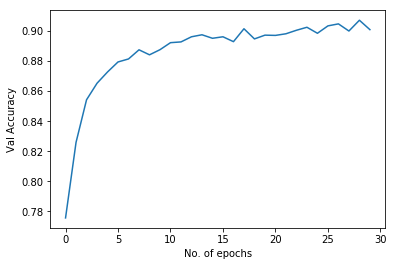

In [18]:
plt.plot(hst.history['val_acc'])
plt.xlabel('No. of epochs')
plt.ylabel('Val Accuracy')
plt.show()

In [0]:
y_pred = model.predict_classes(testX)

In [0]:
pd.DataFrame(y_pred).to_pickle("drive/My Drive/lastassignmentdataset/predict.pickle")

In [0]:
model.save("drive/My Drive/lastassignmentdataset/model.h5")